In [1]:
import os
from os.path import join
import pandas as pd

data_dir = os.getenv('HOME')+'/aiffel/sales_prediction/data'

item_categories_data_path = join(data_dir, 'item_categories.csv')
items_data_path = join(data_dir, 'items.csv')
sales_train_data_path = join(data_dir, 'sales_train.csv')
shops_data_path = join(data_dir, 'shops.csv')
sample_data_path = join(data_dir, 'sample_submission.csv')
test_data_path = join(data_dir, 'test.csv')

item_categories = pd.read_csv(item_categories_data_path)
items = pd.read_csv(items_data_path)
sales_train = pd.read_csv(sales_train_data_path)
shops = pd.read_csv(shops_data_path)
sample = pd.read_csv(sample_data_path)
test = pd.read_csv(test_data_path)


In [2]:
import os
os.getcwd()

'/home/aiffel0042/aiffel/sales_prediction'

In [3]:
shop_id = pd.read_csv('./data/shop_v2.csv')

In [11]:
shop_id = pd.read_csv('./data/shop_v2.csv')

shop_id.columns

shop_id = shop_id[['shop_id', 'city_code', 'population', 'capital_code']]

shop_id['population'] = shop_id['population'].fillna(shop_id['population'].mean())

monthly_tmp = pd.read_csv('./data/monthly_tmp_v2.csv')

holiday = pd.read_csv('./data/holiday_v2.csv')

monthly_tmp = monthly_tmp[['Month',	'temperature']]

holiday= holiday[['Month','Number of days']]

item_ct = pd.read_csv('./data/item_categories_add.csv')

In [12]:
item_ct

,item_category_id,item_category_name,item_category_name_L
0,0,PC - Headsets / Headphones,Headsets
1,1,Accessories - PS2,Accessories
2,2,Accessories - PS3,Accessories
3,3,Accessories - PS4,Accessories
4,4,Accessories - PSP,Accessories
...,...,...,...
79,79,System Tools,System
80,80,Utilities - Tickets,Utilities
81,81,Net carriers (spire),Net carriers
82,82,Net carriers (piece),Net carriers


In [5]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
len(sorted(sales_train[sales_train['date_block_num']==33]['item_id'].unique()))

5413

In [7]:
len(sorted(test['item_id'].unique()))

5100

In [8]:
sales_train.head(30)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [9]:
sales_train['year'] = sales_train['date'].dt.year
sales_train['year_month'] = sales_train['date'].dt.to_period('M')

AttributeError: Can only use .dt accessor with datetimelike values

In [10]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [79]:
sales_train['year_month_day'] = sales_train['date'].dt.to_period('D')
sales_train.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,year_month,year_month_day
0,2013-02-01,0,59,22154,999.00,1.0,2013,2013-02,2013-02-01
1,2013-03-01,0,25,2552,899.00,1.0,2013,2013-03,2013-03-01
2,2013-05-01,0,25,2552,899.00,-1.0,2013,2013-05,2013-05-01
3,2013-06-01,0,25,2554,1709.05,1.0,2013,2013-06,2013-06-01
4,2013-01-15,0,25,2555,1099.00,1.0,2013,2013-01,2013-01-15


In [16]:
# 여기서 피처를? 도시의 인구?
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [25]:
item_per_cat = pd.DataFrame((items.groupby('item_category_id').count()['item_id']))

In [32]:
item_per_cat.sort_values(by='item_id',ascending=False).head()

,item_id
item_category_id,
40,5035
55,2365
37,1780
31,1125
58,790


- 모스코바 이냐 아니냐에 따라 달라지지않을까?
- 인구수에 따라 판매량이 달라질수도?
- train/test의 다른 shop과 item id test에 맞춰서 해야할듯
- 기간의 영향? 10월에만 잘팔릴수도 있는 게 있을지도?
- 같이 잘 팔리는 게 있지 않을까?
-  Note that the list of shops and products slightly changes every month.

In [37]:
sales_date = pd.DataFrame((sales_train.groupby('shop_id').nunique()['date_block_num']))

In [47]:
sales_date.sort_values('date_block_num',ascending=False)

,date_block_num
shop_id,
59,34
31,34
21,34
22,34
52,34
24,34
25,34
26,34
28,34


In [46]:
test.sort_values(by=['shop_id','item_id'])['shop_id'].unique()

array([ 2,  3,  4,  5,  6,  7, 10, 12, 14, 15, 16, 18, 19, 21, 22, 24, 25,
       26, 28, 31, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49,
       50, 52, 53, 55, 56, 57, 58, 59])

In [33]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [34]:
train[train['item_id'] == 22154]['item_price'].value_counts()

999.0    32
299.0    23
657.0     4
Name: item_price, dtype: int64

In [4]:
train.sort_values(by=['shop_id','item_id'])

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
173344,21.02.2013,1,0,30,265.0,2.0
173345,20.02.2013,1,0,30,265.0,2.0
173346,18.02.2013,1,0,30,265.0,4.0
173347,17.02.2013,1,0,30,265.0,4.0
173348,16.02.2013,1,0,30,265.0,9.0
...,...,...,...,...,...,...
2724674,21.07.2015,30,59,22164,699.0,1.0
996180,25.10.2013,9,59,22167,299.0,1.0
1219808,14.12.2013,11,59,22167,299.0,1.0
1219809,03.12.2013,11,59,22167,299.0,1.0


- ID - an Id that represents a (Shop, Item) tuple within the test set
>> test set에서 (Shop, Item)인 튜플 형태로 나타내어지는 id

- shop_id - unique identifier of a shop
>> shop의 id

- item_id - unique identifier of a product
>> product의 id 

- item_category_id - unique identifier of item category
>> item category의 id

- item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
>> 팔린 상품들의 수, 우리는 이 변수의 월별 크기를 예측해야합니다
  
- item_price - current price of an item
>> 현재 아이템의 가격

- date - date in format dd/mm/yyyy
>> 날짜 입니다 format은 dd/mm/yyyy로 되어있습니다(datetime으로!!! 변경합시다)

- date_block_num - a consecutive month number, used for convenience. January  2013 is 0, February 2013 is 1,..., October 2015 is 33
>> 연속적으로 센 달의 수를 말합니다 편의를 위해 사용되었습니다. 2013년 1월 은 0부터 해서 2013년 2월은 1  2015년 10월 33으로 됩니다

- item_name - name of item
>> item의 이름

- shop_name - name of shop
>> shop의 이름

- item_category_name - name of item category
>> item category의 이름

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [5]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [9]:
train['item_cnt_day'].value_counts()

1.0      2629372
2.0       194201
3.0        47350
4.0        19685
5.0        10474
          ...   
179.0          1
187.0          1
194.0          1
195.0          1
508.0          1
Name: item_cnt_day, Length: 198, dtype: int64

In [6]:
test = pd.read_csv('./data/test.csv')

In [7]:
test.sort_values(by=['shop_id','item_id'])

,ID,shop_id,item_id
22987,22987,2,30
20994,20994,2,31
20995,20995,2,32
22492,22492,2,33
22491,22491,2,38
...,...,...,...
149575,149575,59,22162
148799,148799,59,22163
149242,149242,59,22164
152328,152328,59,22166


In [12]:
test[test['shop_id'] == 2]['item_id']

20400     5037
20401     5320
20402     5233
20403     5232
20404     5268
         ...  
25495    18454
25496    16188
25497    15757
25498    19648
25499      969
Name: item_id, Length: 5100, dtype: int64

In [18]:
len(train['shop_id'].value_counts())

60

In [17]:
len(test['shop_id'].value_counts())

42

In [23]:
len(train['item_id'].value_counts())

21807

In [22]:
len(test['item_id'].value_counts())

5100

In [25]:
sub = pd.read_csv('./data/sample_submission.csv')

In [26]:
sub.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [27]:
len(sub)

214200

In [28]:
5100*42

214200

Text(0, 0.5, 'amount of data per shop')

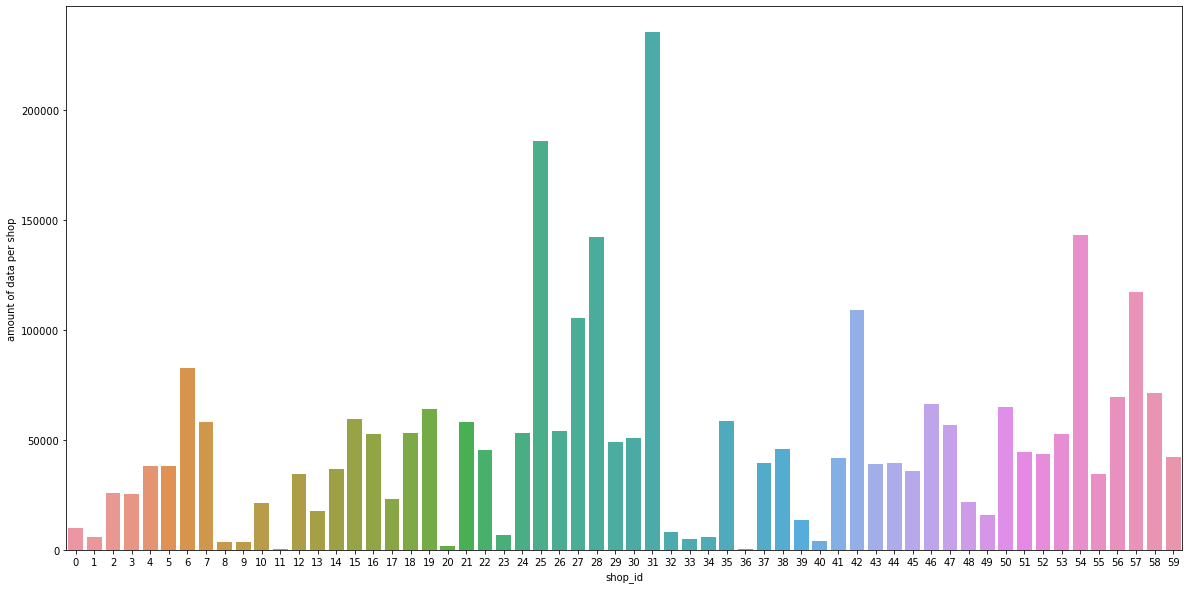

In [52]:

import matplotlib.pyplot as plt
import seaborn as sns

shop_sales_count=pd.DataFrame(sales_train.groupby('shop_id').count()['item_cnt_day'])
shop_sales_count.describe()
fig=plt.figure(figsize=(20,10))
sns.barplot(data=shop_sales_count, y='item_cnt_day', x=shop_sales_count.index)
plt.ylabel('amount of data per shop')

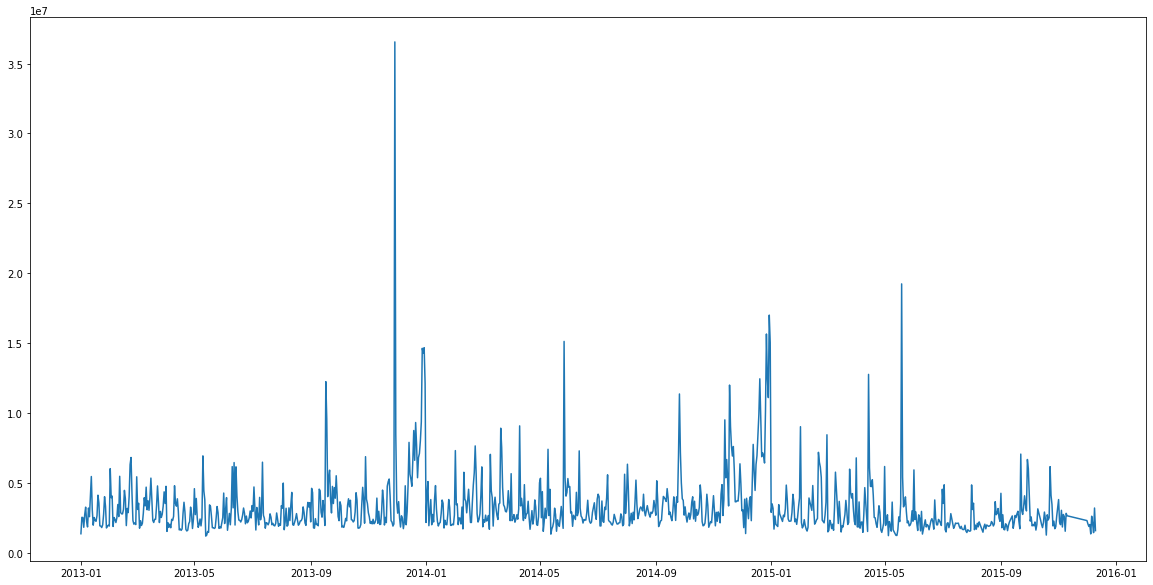

In [56]:
# 매출은 증감이 있다.
sales_train['date']=pd.to_datetime(sales_train['date'])
item_cate_merge=pd.merge(items, item_categories)
shop_item_cate=pd.merge(sales_train, item_cate_merge)
shop_item_cate['revenue']=shop_item_cate['item_price']*shop_item_cate['item_cnt_day']

#shop_item_cate

shop_item_cate.groupby('date').sum()['revenue']
fig=plt.figure(figsize=(20,10))
plt.plot(shop_item_cate.groupby('date').sum()['revenue'])

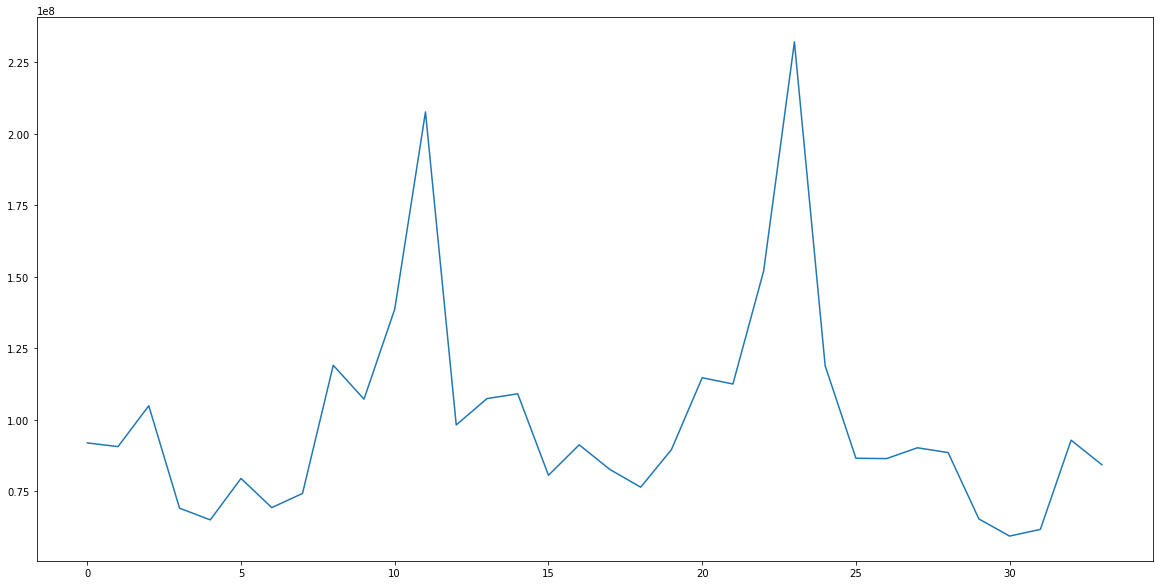

In [60]:
fig=plt.figure(figsize=(20,10))
plt.plot(shop_item_cate.groupby('date_block_num').sum()['revenue'])

In [61]:
shop_item_cate.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,revenue
0,2013-02-01,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,999.0
1,2013-01-23,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,999.0
2,2013-01-20,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,999.0
3,2013-02-01,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,999.0
4,2013-03-01,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,999.0


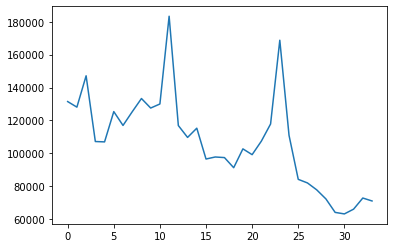

In [62]:
plt.plot(shop_item_cate.groupby('date_block_num').sum()['item_cnt_day'])

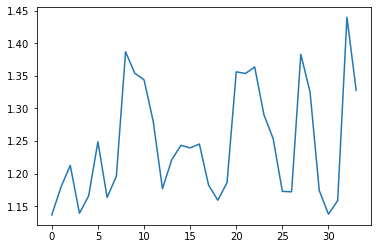

In [63]:
plt.plot(shop_item_cate.groupby('date_block_num').mean()['item_cnt_day'])

In [72]:
shop_item_cate.groupby(['shop_id','date_block_num']).count()['item_cnt_day']

shop_id  date_block_num
0        0                 4793
         1                 5064
1        0                 2694
         1                 2984
2        0                 1071
                           ... 
59       29                 836
         30                 916
         31                 973
         32                 778
         33                 729
Name: item_cnt_day, Length: 1586, dtype: int64

In [80]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [133]:
tr_merge= pd.merge(left = sales_train, right=test, how = 'right',
    on = ['shop_id','item_id'])

In [134]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [136]:
sales_train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,year_month,year_month_day
2935844,2015-10-10,33,25,7409,299.0,1.0,2015,2015-10,2015-10-10
2935845,2015-09-10,33,25,7460,299.0,1.0,2015,2015-09,2015-09-10
2935846,2015-10-14,33,25,7459,349.0,1.0,2015,2015-10,2015-10-14
2935847,2015-10-22,33,25,7440,299.0,1.0,2015,2015-10,2015-10-22
2935848,2015-03-10,33,25,7460,299.0,1.0,2015,2015-03,2015-03-10


In [137]:
len(sorted(sales_train['item_id'].unique()))

21807

In [138]:
len(sorted(test['item_id'].unique()))

5100

In [141]:
len(sorted(test['shop_id'].unique()))

42

In [163]:
len(sorted(tr_merge['item_id'].unique()))

5100

In [164]:
len(sorted(tr_merge['shop_id'].unique()))

42

In [106]:
tr_merge.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,year_month,year_month_day,ID
0,2013-02-01,0.0,59,22154,999.0,1.0,2013.0,2013-02,2013-02-01,150983
1,2013-03-01,0.0,25,2574,399.0,2.0,2013.0,2013-03,2013-03-01,56520
2,2013-05-01,0.0,25,2574,399.0,1.0,2013.0,2013-05,2013-05-01,56520
3,2013-07-01,0.0,25,2574,399.0,1.0,2013.0,2013-07,2013-07-01,56520
4,2013-08-01,0.0,25,2574,399.0,2.0,2013.0,2013-08,2013-08-01,56520


In [110]:
sales_train.shape
tr_merge.shape

(1327235, 10)

In [142]:
train_join = tr_merge.drop('ID',axis=1,inplace=False)

In [144]:
train_join.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,year_month,year_month_day
0,2013-02-01,0.0,59,22154,999.0,1.0,2013.0,2013-02,2013-02-01
1,2013-03-01,0.0,25,2574,399.0,2.0,2013.0,2013-03,2013-03-01
2,2013-05-01,0.0,25,2574,399.0,1.0,2013.0,2013-05,2013-05-01
3,2013-07-01,0.0,25,2574,399.0,1.0,2013.0,2013-07,2013-07-01
4,2013-08-01,0.0,25,2574,399.0,2.0,2013.0,2013-08,2013-08-01


In [146]:
train_join.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,year_month,year_month_day
1327230,NaT,NaN,45,9500,NaN,NaN,NaN,NaT,NaT
1327231,NaT,NaN,45,16007,NaN,NaN,NaN,NaT,NaT
1327232,NaT,NaN,45,18027,NaN,NaN,NaN,NaT,NaT
1327233,NaT,NaN,45,16188,NaN,NaN,NaN,NaT,NaT
1327234,NaT,NaN,45,19648,NaN,NaN,NaN,NaT,NaT


In [172]:
test[['shop_id','item_id']].sort_values(by = ['shop_id','item_id'])

,shop_id,item_id
22987,2,30
20994,2,31
20995,2,32
22492,2,33
22491,2,38
...,...,...
149575,59,22162
148799,59,22163
149242,59,22164
152328,59,22166


In [174]:
train_join[['shop_id','item_id']].sort_values(by = ['shop_id','item_id'])

,shop_id,item_id
353679,2,30
353680,2,30
353681,2,30
353682,2,30
268413,2,31
...,...,...
1291617,59,22166
588532,59,22167
588533,59,22167
588534,59,22167


In [178]:
train_join_na = train_join.dropna(axis=0)

In [179]:
train_join_na.shape

(1224439, 9)

In [177]:
test_shop_id=test.shop_id.unique()
test_item_id=test.item_id.unique()
sales_train[(sales_train['shop_id'].isin(test_shop_id))&(sales_train['item_id'].isin(test_item_id))]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,year_month,year_month_day
0,2013-02-01,0,59,22154,999.0,1.0,2013,2013-02,2013-02-01
10,2013-03-01,0,25,2574,399.0,2.0,2013,2013-03,2013-03-01
11,2013-05-01,0,25,2574,399.0,1.0,2013,2013-05,2013-05-01
12,2013-07-01,0,25,2574,399.0,1.0,2013,2013-07,2013-07-01
13,2013-08-01,0,25,2574,399.0,2.0,2013,2013-08,2013-08-01
...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.0,1.0,2015,2015-10,2015-10-10
2935845,2015-09-10,33,25,7460,299.0,1.0,2015,2015-09,2015-09-10
2935846,2015-10-14,33,25,7459,349.0,1.0,2015,2015-10,2015-10-14
2935847,2015-10-22,33,25,7440,299.0,1.0,2015,2015-10,2015-10-22


In [180]:
sales_train_preprocess = sales_train[(sales_train['shop_id'].isin(test_shop_id))&(sales_train['item_id'].isin(test_item_id))]

In [181]:
sales_train_preprocess.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,year_month,year_month_day
0,2013-02-01,0,59,22154,999.0,1.0,2013,2013-02,2013-02-01
10,2013-03-01,0,25,2574,399.0,2.0,2013,2013-03,2013-03-01
11,2013-05-01,0,25,2574,399.0,1.0,2013,2013-05,2013-05-01
12,2013-07-01,0,25,2574,399.0,1.0,2013,2013-07,2013-07-01
13,2013-08-01,0,25,2574,399.0,2.0,2013,2013-08,2013-08-01


In [237]:
sales_train_preprocess['date_block_num'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [208]:
sales_train_preprocess['item_cnt_day'].value_counts().sort_index().head(15)

-16.0          1
-6.0           1
-5.0           2
-4.0           2
-3.0           9
-2.0          33
-1.0        2893
 1.0     1072620
 2.0       92949
 3.0       23636
 4.0       10309
 5.0        5612
 6.0        3596
 7.0        2308
 8.0        1687
Name: item_cnt_day, dtype: int64

In [214]:
sales_train_preprocess['item_price'].value_counts().sort_index().head(15)c

0.500000    609
0.908714      1
0.990000    152
2.000000     10
2.990000      1
3.000000    434
3.570000      3
3.590000      2
3.670000      1
3.710000      3
3.800000      2
4.000000     75
4.029126      1
4.055556      1
4.142857      1
Name: item_price, dtype: int64

In [215]:
sales_train_preprocess['item_price'].value_counts().sort_index().tail(15)

31599.0     1
31699.0     1
31990.0    15
32199.0    16
32382.0     1
32490.0     4
32990.0    51
33490.0     8
34990.0    11
35991.0     1
37991.0     2
40991.0     1
41990.0     3
42990.0     4
59200.0     1
Name: item_price, dtype: int64

In [292]:
item_per_month = pd.DataFrame((sales_train.groupby(['shop_id','item_id','date_block_num']).count()['item_cnt_day']))

In [293]:
item_per_month

item_cnt_day
shop_id item_id date_block_num              
0       30      1                          9
        31      1                          7
        32      0                          4
                1                          7
        33      0                          3
...                                      ...
59      22164   27                         2
                30                         1
        22167   9                          1
                11                         2
                17                         1

[1609124 rows x 1 columns]

In [294]:
item_per_month = item_per_month.unstack()

In [295]:
item_per_month

item_cnt_day                                          ...      \
date_block_num            0     1   2   3   4   5    6   7   8    9   ...  24   
shop_id item_id                                                       ...       
0       30               NaN   9.0 NaN NaN NaN NaN  NaN NaN NaN  NaN  ... NaN   
        31               NaN   7.0 NaN NaN NaN NaN  NaN NaN NaN  NaN  ... NaN   
        32               4.0   7.0 NaN NaN NaN NaN  NaN NaN NaN  NaN  ... NaN   
        33               3.0   3.0 NaN NaN NaN NaN  NaN NaN NaN  NaN  ... NaN   
        35               1.0  11.0 NaN NaN NaN NaN  NaN NaN NaN  NaN  ... NaN   
...                      ...   ...  ..  ..  ..  ..  ...  ..  ..  ...  ...  ..   
59      22154            1.0   NaN NaN NaN NaN NaN  NaN NaN NaN  NaN  ... NaN   
        22155            NaN   NaN NaN NaN NaN NaN  1.0 NaN NaN  NaN  ... NaN   
        22162            NaN   NaN NaN NaN NaN NaN  NaN NaN NaN  NaN  ... NaN   
        22164            NaN   NaN NaN NaN NaN NaN  NaN NaN NaN  NaN  ... NaN   
        22167            NaN   NaN NaN NaN NaN NaN  NaN NaN NaN  1.0  ... NaN   

                                                           
date_block_num    25   26   27   28  29   30   31  32  33  
shop_id item_id                                            
0       30       NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
        31       NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
        32       NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
        33       NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
        35       NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
...              ...  ...  ...  ...  ..  ...  ...  ..  ..  
59      22154    NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
        22155    NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
        22162    9.0  4.0  1.0  1.0 NaN  NaN  1.0 NaN NaN  
        22164    2.0  1.0  2.0  NaN NaN  1.0  NaN NaN NaN  
        22167    NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  

[424124 rows x 34 columns]

In [299]:
item_per_month = item_per_month.fillna(0)

In [300]:
item_per_month

item_cnt_day                                                \
date_block_num            0     1    2    3    4    5    6    7    8    9    
shop_id item_id                                                              
0       30               0.0   9.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        31               0.0   7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        32               4.0   7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        33               3.0   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        35               1.0  11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                      ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
59      22154            1.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        22155            0.0   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
        22162            0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        22164            0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        22167            0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   

                 ...                                                    
date_block_num   ...   24   25   26   27   28   29   30   31   32   33  
shop_id item_id  ...                                                    
0       30       ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        31       ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        32       ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        33       ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        35       ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
59      22154    ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        22155    ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        22162    ...  0.0  9.0  4.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  
        22164    ...  0.0  2.0  1.0  2.0  0.0  0.0  1.0  0.0  0.0  0.0  
        22167    ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[424124 rows x 34 columns]

### Feature을 뭘 넣어야할지

일단 기준은 shop id와 item_id 기준

In [248]:
item_cnt= sales_train_preprocess.set_index(['shop_id','item_id','date_block_num'])

In [285]:
sales_train['date']=pd.to_datetime(sales_train['date'])

In [287]:
sales_train = pd.read_csv('./data/sales_train.csv')

In [288]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [4]:
sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y', errors='raise')

In [5]:
sales_train['date'].value_counts().sort_index().tail(50)

2015-09-12    2556
2015-09-13    2202
2015-09-14    1304
2015-09-15    1243
2015-09-16    1419
2015-09-17    1429
2015-09-18    1633
2015-09-19    2081
2015-09-20    1788
2015-09-21    1297
2015-09-22    1530
2015-09-23    1356
2015-09-24    1415
2015-09-25    1672
2015-09-26    2149
2015-09-27    1945
2015-09-28    1223
2015-09-29    1393
2015-09-30    1252
2015-10-01    1595
2015-10-02    2003
2015-10-03    2871
2015-10-04    2505
2015-10-05    1176
2015-10-06    1152
2015-10-07    1459
2015-10-08    1328
2015-10-09    1653
2015-10-10    2341
2015-10-11    2152
2015-10-12    1211
2015-10-13    1389
2015-10-14    1372
2015-10-15    1374
2015-10-16    1841
2015-10-17    2397
2015-10-18    2020
2015-10-19    1201
2015-10-20    1464
2015-10-21    1335
2015-10-22    1332
2015-10-23    1981
2015-10-24    2462
2015-10-25    2155
2015-10-26    1224
2015-10-27    1361
2015-10-28    1238
2015-10-29    1405
2015-10-30    1938
2015-10-31    2579
Name: date, dtype: int64

In [6]:
item_time[('item_cnt_day', '2015-12')].value_counts()

NameError: name 'item_time' is not defined

In [7]:
item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [8]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [9]:
item_with_cate = pd.merge(items,item_categories)

In [10]:
item_with_cate['item_category_name'].value_counts().head()

Кино - DVD                             5035
Музыка - CD локального производства    2365
Кино - Blu-Ray                         1780
Игры PC - Цифра                        1125
Музыка - Винил                          790
Name: item_category_name, dtype: int64

In [11]:
sale_item_cate = pd.merge(sales_train,item_with_cate)

In [20]:
shop

NameError: name 'shop' is not defined

In [19]:
sale_item_cate['item_name'].value_counts().head(50)

Фирменный пакет майка 1С Интерес белый (34*42) 45 мкм                                              31340
Playstation Store пополнение бумажника: Карта оплаты 1000 руб.                                      9408
Прием денежных средств для 1С-Онлайн                                                                9067
Diablo III [PC, Jewel, русская версия]                                                              7479
Kaspersky Internet Security Multi-Device Russian Edition. 2-Device 1 year Renewal Box               6853
World of Warcraft. Карта оплаты игрового времени (online) (рус.в.) (60 дней) (Jewel)                6602
Grand Theft Auto V [PS3, русские субтитры]                                                          6475
Call of Duty: Black Ops II [PС, Jewel, русская версия]                                              6320
Minecraft [Xbox 360, английская версия]                                                             5811
Grand Theft Auto V [Xbox 360, русские субтитры]        

In [18]:
sale_item_cate['item_name'].value_counts().tail(25)

1С:Коллекция игрушек "Ну, погоди! Выпуск 3. Песня для зайца" [PC, Цифровая версия]                                  1
Фигурка Star Wars Chewbacca Bobblehead S2                                                                           1
Age of Conan: Hyborian Adventures. Русская версия DVD                                                               1
Брелок Breaking Bad Meth Barrel Keychain                                                                            1
Проклятая гора (PC-DVD) (Jewel)                                                                                     1
UserGate Proxy & Firewall 6.X с модулем фильтрации сайтов Entensys URL Filtering до 200 сессий (Academic/Social)    1
COLLINS PHIL  Testify                                                                                               1
LUMEN  Мир                                                                                                          1
1С:Аудиокниги "Севастопольские рассказы" [Цифровая верси

In [17]:
sale_item_cate['item_category_name'].value_counts().head(30)

Кино - DVD                                  564652
Игры PC - Стандартные издания               351591
Музыка - CD локального производства         339585
Игры - PS3                                  208219
Кино - Blu-Ray                              192674
Игры - XBOX 360                             146789
Игры PC - Дополнительные издания            121539
Игры - PS4                                   79058
Подарки - Мягкие игрушки                     53845
Подарки - Настольные игры (компактные)       53227
Подарки - Фигурки                            47177
Кино - Blu-Ray 3D                            42718
Программы - Для дома и офиса                 42603
Подарки - Развитие                           41706
Подарки - Настольные игры                    37635
Подарки - Сувениры (в навеску)               35484
Кино - Коллекционное                         32748
Музыка - MP3                                 32490
Игры - PSP                                   32164
Подарки - Сумки, Альбомы, Коври

In [15]:
sale_item_cate['item_category_name'].value_counts().tail(15)

Подарки - Сертификаты, услуги        123
Игры Android - Цифра                  91
Программы - MAC (Цифра)               56
Карты оплаты - Windows (Цифра)        19
Книги - Бизнес литература             15
Игры - PS2                            11
Игры MAC - Цифра                       8
Книги - Компьютерная литература        6
Книги - Художественная литература      3
Книги - Путеводители                   3
PC - Гарнитуры/Наушники                3
Аксессуары - PS2                       2
Книги - Открытки                       2
Игровые консоли - PS2                  1
Книги - Познавательная литература      1
Name: item_category_name, dtype: int64

- sort_values
- nununique
- value_counts
- group_by - sum,mean,agg
- unique

In [1]:
sales_train.head()

NameError: name 'sales_train' is not defined

In [1]:
import os
from os.path import join
import pandas as pd

data_dir = os.getenv('HOME')+'/aiffel/sales_prediction/data'

item_categories_data_path = join(data_dir, 'item_categories.csv')
items_data_path = join(data_dir, 'items.csv')
sales_train_data_path = join(data_dir, 'sales_train.csv')
shops_data_path = join(data_dir, 'shops.csv')
sample_data_path = join(data_dir, 'sample_submission.csv')
test_data_path = join(data_dir, 'test.csv')

item_categories = pd.read_csv(item_categories_data_path)
items = pd.read_csv(items_data_path)
sales_train = pd.read_csv(sales_train_data_path)
shops = pd.read_csv(shops_data_path)
sample = pd.read_csv(sample_data_path)
test = pd.read_csv(test_data_path)


In [13]:
# drop duplicates
subset = ['date','date_block_num','shop_id','item_id','item_cnt_day']
print(sales_train.duplicated(subset=subset).value_counts())
sales_train.drop_duplicates(subset=subset, inplace=True)


False    2935825
True          24
dtype: int64


In [14]:
#drop shops&items not in test data 
test_shops = test.shop_id.unique() 

test_items = test.item_id.unique() 

train = sales_train[sales_train.shop_id.isin(test_shops)] 

train = sales_train[sales_train.item_id.isin(test_items)]


In [29]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
10,03.01.2013,0,25,2574,399.0,2.0
11,05.01.2013,0,25,2574,399.0,1.0
12,07.01.2013,0,25,2574,399.0,1.0
13,08.01.2013,0,25,2574,399.0,2.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0


In [31]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [28]:
from itertools import product
import numpy as np 
# create all combinations 
block_shop_combi = pd.DataFrame(list(product(np.arange(34), test_shops)), columns=['date_block_num','shop_id'])

shop_item_combi = pd.DataFrame(list(product(test_shops, test_items)), columns=['shop_id','item_id'])

all_combi = pd.merge(block_shop_combi, shop_item_combi, on=['shop_id'], how='inner') # group by monthly

train_base = pd.merge(all_combi, train, on=['date_block_num','shop_id','item_id'], how='left') 

train_base['item_cnt_day'].fillna(0, inplace=True)
 
train_grp = train_base.groupby(['date_block_num','shop_id','item_id','item_category_id'])


KeyError: 'item_category_id'

In [16]:
#summary count by month
# 한달단위의 팔린 갯수 및 주문 수
# 극단 값들을 0,20사이의 값들로 만들어준다. 

train_monthly = pd.DataFrame(train_grp.agg({'item_cnt_day':['sum','count']})).reset_index() 

train_monthly.columns = ['date_block_num','shop_id','item_id','item_cnt','item_order'] 

print(train_monthly[['item_cnt','item_order']].describe()) 
# trim count 

train_monthly['item_cnt'].clip(0, 20, inplace=True) 
train_grp.head()


           item_cnt    item_order
count  7.282800e+06  7.282800e+06
mean   2.221345e-01  1.085718e+00
std    3.324564e+00  7.254517e-01
min   -4.000000e+00  1.000000e+00
25%    0.000000e+00  1.000000e+00
50%    0.000000e+00  1.000000e+00
75%    0.000000e+00  1.000000e+00
max    2.253000e+03  3.100000e+01


,date_block_num,shop_id,item_id,date,item_price,item_cnt_day
0,0,5,5037,NaN,NaN,0.0
1,0,5,5320,NaN,NaN,0.0
2,0,5,5233,NaN,NaN,0.0
3,0,5,5232,NaN,NaN,0.0
4,0,5,5268,NaN,NaN,0.0
...,...,...,...,...,...,...
7907065,33,45,18454,30.10.2015,99.0,1.0
7907066,33,45,16188,NaN,NaN,0.0
7907067,33,45,15757,NaN,NaN,0.0
7907068,33,45,19648,NaN,NaN,0.0


In [17]:
train_base.head()

,date_block_num,shop_id,item_id,date,item_price,item_cnt_day
0,0,5,5037,NaN,NaN,0.0
1,0,5,5320,NaN,NaN,0.0
2,0,5,5233,NaN,NaN,0.0
3,0,5,5232,NaN,NaN,0.0
4,0,5,5268,NaN,NaN,0.0


In [18]:
train_grp['item_cnt_day'].value_counts()

date_block_num  shop_id  item_id  item_cnt_day
0               2        30       0.0             1
                         31       0.0             1
                         32       0.0             1
                         33       1.0             1
                         38       0.0             1
                                                 ..
33              59       22162    0.0             1
                         22163    0.0             1
                         22164    0.0             1
                         22166    0.0             1
                         22167    0.0             1
Name: item_cnt_day, Length: 7371760, dtype: int64

In [19]:
train_piv = train_monthly.pivot_table(index=['shop_id','item_id'], 
                                      columns=['date_block_num'], 
                                      values='item_cnt', aggfunc=np.sum, fill_value=0) 
train_piv = train_piv.reset_index() 
train_piv.head()

date_block_num,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,2,30,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,31,0,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,32,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,2,33,1,0,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
4,2,38,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
train_piv = train_piv.reset_index() 
train_piv.head()

date_block_num,index,shop_id,item_id,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,0,2,30,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,31,0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,2,32,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,3,2,33,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
4,4,2,38,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# 이동평균과 지수평균을 이용한다.
# 이동평균을 통해 shop_id, item_id

In [22]:
# 이동평균과 지수평균 앞의 12개월은 지운다. 
col = np.arange(34) 
pivT = train_piv[col].T 
mov_s = pivT.rolling(3).mean().T 
mov_m = pivT.rolling(6).mean().T 
mov_l = pivT.rolling(12).mean().T 
ema_s = pivT.ewm(span=3).mean().T 
ema_m = pivT.ewm(span=6).mean().T 
ema_l = pivT.ewm(span=9).mean().T
ema_xl = pivT.ewm(span=12).mean().T 
 
ema_list = []
col_select = np.arange(11,34) 
for c in col_select: 
    sub_ema = pd.concat([train_piv.loc[:,['shop_id','item_id']], 
                         pd.DataFrame(mov_s.loc[:,c]).rename(columns={c:'cnt_mov_s_prev'}), 
                         pd.DataFrame(mov_m.loc[:,c]).rename(columns={c:'cnt_mov_m_prev'}), 
                         pd.DataFrame(mov_l.loc[:,c]).rename(columns={c:'cnt_mov_l_prev'}),
                         pd.DataFrame(ema_s.loc[:,c]).rename(columns={c:'cnt_ema_s_prev'}), 
                         pd.DataFrame(ema_m.loc[:,c]).rename(columns={c:'cnt_ema_m_prev'}), 
                         pd.DataFrame(ema_l.loc[:,c]).rename(columns={c:'cnt_ema_l_prev'}),
                         pd.DataFrame(ema_l.loc[:,c]).rename(columns={c:'cnt_ema_xl_prev'})],
                         axis=1) 
    sub_ema['date_block_num'] = c 
    ema_list.append(sub_ema) 

train_ema_prev = pd.concat(ema_list) 
train_ema_prev.head()


,shop_id,item_id,cnt_mov_s_prev,cnt_mov_m_prev,cnt_mov_l_prev,cnt_ema_s_prev,cnt_ema_m_prev,cnt_ema_l_prev,cnt_ema_xl_prev,date_block_num
0,2,30,0.0,0.0,0.166667,0.008791,0.052704,0.085122,0.085122,11
1,2,31,0.0,0.0,0.500000,0.004884,0.074004,0.157093,0.157093,11
2,2,32,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,11
3,2,33,1.0,0.5,0.333333,1.000488,0.713518,0.576819,0.576819,11
4,2,38,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,11


In [23]:
mov_l.loc[:,11]

0         0.166667
1         0.500000
2         0.000000
3         0.333333
4         0.000000
            ...   
214195    0.000000
214196    0.000000
214197    0.000000
214198    0.000000
214199    0.250000
Name: 11, Length: 214200, dtype: float64

In [46]:
ema_s.loc[:,0].value_counts()

0.0     206386
1.0       4556
2.0       1327
3.0        615
4.0        349
5.0        200
6.0        178
7.0        108
20.0        82
8.0         78
9.0         69
10.0        52
11.0        44
12.0        27
15.0        26
13.0        25
14.0        24
18.0        19
16.0        15
17.0        14
19.0         6
Name: 0, dtype: int64

In [39]:
mov_s

date_block_num,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,NaN,NaN,NaN,NaN,NaN,0.333333,0.333333,0.333333,0.166667,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.333333,0.166667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667
2,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.833333,0.500000,0.500000,0.166667,0.166667,0.333333,0.166667,0.166667
3,NaN,NaN,NaN,NaN,NaN,0.166667,0.000000,0.000000,0.000000,0.000000,...,0.166667,0.333333,0.166667,0.333333,0.500000,0.500000,0.666667,0.500000,0.666667,0.500000
4,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.500000,2.166667,2.333333,2.500000,2.500000,2.500000,1.166667,0.500000,0.333333
214196,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
214197,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.333333,0.500000,0.833333,0.833333,0.833333,1.000000,0.666667,0.500000,0.166667
214198,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
sub_ema['date_block_num']

0         34
1         34
2         34
3         34
4         34
          ..
214195    34
214196    34
214197    34
214198    34
214199    34
Name: date_block_num, Length: 214200, dtype: int64

In [19]:
ema_s = pivT.ewm(span=4).mean().T 

In [25]:
ema_s.loc[:,0]

0         0.0
1         0.0
2         0.0
3         1.0
4         0.0
         ... 
214195    0.0
214196    0.0
214197    0.0
214198    0.0
214199    0.0
Name: 0, Length: 214200, dtype: float64

In [18]:
train_ema_prev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7282800 entries, 0 to 214199
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   shop_id         int64  
 1   item_id         int64  
 2   cnt_ema_s_prev  float64
 3   cnt_ema_m_prev  float64
 4   cnt_ema_l_prev  float64
 5   cnt_macd_prev   float64
 6   cnt_sig_prev    float64
 7   date_block_num  int64  
dtypes: float64(5), int64(3)
memory usage: 500.1 MB


In [15]:
col = np.arange(34) 
pivT = train_piv[col].T
pivT

,0,1,2,3,4,5,6,7,8,9,...,214190,214191,214192,214193,214194,214195,214196,214197,214198,214199
date_block_num,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
test['item_id'].unique()

array([ 5037,  5320,  5233, ..., 15757, 19648,   969])

In [54]:
sales_train['item_id'].unique()

array([22154,  2552,  2554, ...,  7610,  7635,  7640])

In [55]:
test['item_id'].unique() == sales_train['item_id'].unique()

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [57]:
train_ema_prev['item_id'].unique() == test['item_id'].unique()

array([False, False, False, ..., False, False, False])

In [24]:
## 4. 정호

#비어있는 가격예측

from sklearn import ensemble, metrics

train_group = sales_train.groupby(['date_block_num','shop_id','item_id'])

train_price = train_group['item_price'].mean().reset_index()
price = train_price[~train_price['item_price'].isnull()]
price.head()

last_price = price.drop_duplicates(subset=['shop_id', 'item_id'], keep='last').drop(['date_block_num'], axis=1)

uitem = price['item_id'].unique()
pred_price_set = test[~test['item_id'].isin(uitem)].drop('ID', axis=1) 

print(pred_price_set.shape)
pred_price_set.head()


if len(pred_price_set) > 0:
    train_price_set = pd.merge(price, items, on=['item_id'], how='inner')
    pred_price_set = pd.merge(pred_price_set, items, on=['item_id'], how='inner').drop(['item_name'], axis=1)
    reg = ensemble.ExtraTreesRegressor(n_estimators=25, n_jobs=-1, max_depth=15, random_state=42)
    reg.fit(train_price_set[pred_price_set.columns], train_price_set['item_price'])
    pred_price_set['item_price'] = reg.predict(pred_price_set)

test_price = pd.concat([last_price, pred_price_set], join='inner') 

test_price.shape

test_price.head()

#할인률 계산

price_max = price.groupby(['item_id']).max()['item_price'].reset_index()
price_max.rename(columns={'item_price':'item_max_price'}, inplace=True)
price_max.head()

train_price_a = pd.merge(price, price_max, on=['item_id'], how='left')
train_price_a['discount_rate'] = 1 - (train_price_a['item_price'] / train_price_a['item_max_price'])
train_price_a.drop('item_max_price', axis=1, inplace=True)
train_price_a.head()

test_price_a = pd.merge(test_price, price_max, on=['item_id'], how='left')
test_price_a.loc[test_price_a['item_max_price'].isnull(), 'item_max_price'] = test_price_a['item_price']
test_price_a['discount_rate'] = 1 - (test_price_a['item_price'] / test_price_a['item_max_price'])
test_price_a.drop('item_max_price', axis=1, inplace=True)
test_price_a.head()

(15246, 2)


,shop_id,item_id,item_price,discount_rate
0,0,43,221.0,0.108871
1,0,61,195.0,0.441261
2,0,75,76.0,0.489933
3,0,88,76.0,0.489933
4,0,95,193.0,0.354515


In [27]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

def mergeFeature(df): 
    df = pd.merge(df, shop_id, on=['shop_id'], how='left')
    df['Month'] = df['date_block_num'] % 12 +1
    df = pd.merge(df, monthly_tmp, on=['Month'], how='left') 
    df = pd.merge(df, holiday, on=['Month'], how='left') 
    df = pd.merge(df, train_ema_prev, on=['date_block_num','shop_id','item_id']
                  , how='left')
    df = pd.merge(df, item_ct, on=['item_category_id']
                  , how='left')
    df.drop(['shop_id','item_id'], axis=1, inplace=True) 
    df.fillna(0.0, inplace=True)


    return reduce_mem_usage(df)


train_set = train_monthly[train_monthly['date_block_num'] >= 11]

train_set = pd.merge(train_set, train_price_a, on=['date_block_num','shop_id','item_id'], how='left')
 
train_set = mergeFeature(train_set) 
train_set = train_set.join(pd.DataFrame(train_set.pop('item_order'))) # move to last column 
X_train = train_set.drop(['item_cnt'], axis=1) 
Y_train = train_set['item_cnt'].clip(0.,20.) 
X_train.head()



KeyError: 'item_category_id'

In [26]:
item_ct.head()

,item_category_id,item_category_name,item_category_name_L
0,0,PC - Headsets / Headphones,Headsets
1,1,Accessories - PS2,Accessories
2,2,Accessories - PS3,Accessories
3,3,Accessories - PS4,Accessories
4,4,Accessories - PSP,Accessories


In [69]:
#X_train.drop(['shop_id','item_id'],inplace=True,axis=1)

X_train.head()

train_price_a.shape

test_set = test.copy() 
test_set['date_block_num'] = 34 
test_set = pd.merge(test_set, test_price_a, on=['shop_id','item_id'], how='left') 
test_set = mergeFeature(test_set) 
test_set['item_order'] = test_set['cnt_ema_s_prev']
#order_prev 
test_set.loc[test_set['item_order'] == 0, 'item_order'] = 1 
X_test = test_set.drop(['ID'], axis=1) 
X_test.head() 
assert(X_train.columns.isin(X_test.columns).all())


from sklearn import linear_model, preprocessing 
from sklearn.model_selection import GroupKFold 
import lightgbm as lgb 
params={'learning_rate': 0.05, 
        'objective':'regression', 
        'metric':'rmse', 
        'num_leaves': 64, 
        'verbose': 1, 
        'random_state':42, 
        'bagging_fraction': 1, 
        'feature_fraction': 1 
       , 'n_jobs':-1} 
folds = GroupKFold(n_splits=6) 
oof_preds = np.zeros(X_train.shape[0]) 
sub_preds = np.zeros(X_test.shape[0])


for fold_, (trn_, val_) in enumerate(folds.split(X_train, Y_train, X_train['date_block_num'])): 
    trn_x, trn_y = X_train.iloc[trn_], Y_train[trn_] 
    val_x, val_y = X_train.iloc[val_], Y_train[val_] 
    reg = lgb.LGBMRegressor(**params, n_estimators=3000) 
    reg.fit(trn_x, trn_y, eval_set=[(val_x, val_y)], early_stopping_rounds=50, verbose=500) 
    oof_preds[val_] = reg.predict(val_x.values, num_iteration=reg.best_iteration_) 
    sub_preds += reg.predict(X_test.values, num_iteration=reg.best_iteration_) / folds.n_splits



pred_cnt = sub_preds 
result = pd.DataFrame({ "ID": test["ID"], "item_cnt_month": pred_cnt.clip(0. ,20.) }) 
result.to_csv("./submission.csv", index=False)


Memory usage of dataframe is 29.42 MB
Memory usage after optimization is: 8.38 MB
Decreased by 71.5%
Training until validation scores don't improve for 50 rounds
[500]	valid_0's rmse: 0.0925369
[1000]	valid_0's rmse: 0.0912037
Early stopping, best iteration is:
[973]	valid_0's rmse: 0.0911885
Training until validation scores don't improve for 50 rounds
[500]	valid_0's rmse: 0.107138
[1000]	valid_0's rmse: 0.106115
[1500]	valid_0's rmse: 0.105693
Early stopping, best iteration is:
[1519]	valid_0's rmse: 0.105672
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[314]	valid_0's rmse: 0.113035
Training until validation scores don't improve for 50 rounds
[500]	valid_0's rmse: 0.116858
Early stopping, best iteration is:
[596]	valid_0's rmse: 0.116669
Training until validation scores don't improve for 50 rounds
[500]	valid_0's rmse: 0.104521
Early stopping, best iteration is:
[784]	valid_0's rmse: 0.103942
Training until validation scores don't i

In [70]:
pred_cnt = sub_preds result = pd.DataFrame({ "ID": test["ID"], 
                                            "item_cnt_month": pred_cnt.clip(0. ,20.) }) 
result.to_csv("./submission.csv", index=False)

SyntaxError: invalid syntax (<ipython-input-70-5d12ac601585>, line 1)

In [ ]:
from sklearn import linear_model, preprocessing 
from sklearn.model_selection import GroupKFold 
import lightgbm as lgb 
params={'learning_rate': 0.01, 
        'objective':'regression', 
        'metric':'rmse', 
        'num_leaves': 64, 
        'verbose': 1, 
        'random_state':42, 
        'bagging_fraction': 1, 
        'feature_fraction': 1 
       , 'n_jobs':-1} 
folds = GroupKFold(n_splits=6) 
oof_preds = np.zeros(X_train.shape[0]) 
sub_preds = np.zeros(X_test.shape[0])


for fold_, (trn_, val_) in enumerate(folds.split(X_train, Y_train, X_train['date_block_num'])): 
    trn_x, trn_y = X_train.iloc[trn_], Y_train[trn_] 
    val_x, val_y = X_train.iloc[val_], Y_train[val_] 
    reg = lgb.LGBMRegressor(**params, n_estimators=3000) 
    reg.fit(trn_x, trn_y, eval_set=[(val_x, val_y)], early_stopping_rounds=50, verbose=500) 
    oof_preds[val_] = reg.predict(val_x.values, num_iteration=reg.best_iteration_) 
    sub_preds += reg.predict(X_test.values, num_iteration=reg.best_iteration_) / folds.n_splits



pred_cnt = sub_preds 
result = pd.DataFrame({ "ID": test["ID"], "item_cnt_month": pred_cnt.clip(0. ,20.) }) 
result.to_csv("./submission.csv", index=False)


Training until validation scores don't improve for 50 rounds
[500]	valid_0's rmse: 0.105096
[1000]	valid_0's rmse: 0.0968818
[1500]	valid_0's rmse: 0.0942831
[2000]	valid_0's rmse: 0.0929981
[2500]	valid_0's rmse: 0.0922113
[3000]	valid_0's rmse: 0.0917429
Did not meet early stopping. Best iteration is:
[2995]	valid_0's rmse: 0.0917376
Training until validation scores don't improve for 50 rounds
[500]	valid_0's rmse: 0.121212
[1000]	valid_0's rmse: 0.111406
[1500]	valid_0's rmse: 0.108714
[2000]	valid_0's rmse: 0.107446
[2500]	valid_0's rmse: 0.106799
[3000]	valid_0's rmse: 0.106342
Did not meet early stopping. Best iteration is:
[2996]	valid_0's rmse: 0.106339
Training until validation scores don't improve for 50 rounds
[500]	valid_0's rmse: 0.115178
Early stopping, best iteration is:
[659]	valid_0's rmse: 0.114228
Training until validation scores don't improve for 50 rounds
[500]	valid_0's rmse: 0.125667
[1000]	valid_0's rmse: 0.119173
[1500]	valid_0's rmse: 0.117822
